In [5]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report

In [6]:
data = pd.read_csv('zoo.csv',names = ["Animal Name", "Hair", 'Feathers', 'Eggs', 'Milk', 'Airborne', 'Aquatic', 'Predator', 'Toothed','Backbone','Breathes','Venomous','Fins','Legs','Tail','Domestic','Catsize','Type'])
data

,Animal Name,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [8]:
X = data.drop(['Animal Name', 'Type'], axis=1)
y = data['Type']

In [9]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [10]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: Type, Length: 101, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 16), (21, 16), (80,), (21,))

In [27]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [28]:
y_pred_entropy = clf_entropy.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_test, y_pred_entropy)

1.0

In [30]:
print(classification_report(y_test, y_pred_entropy))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



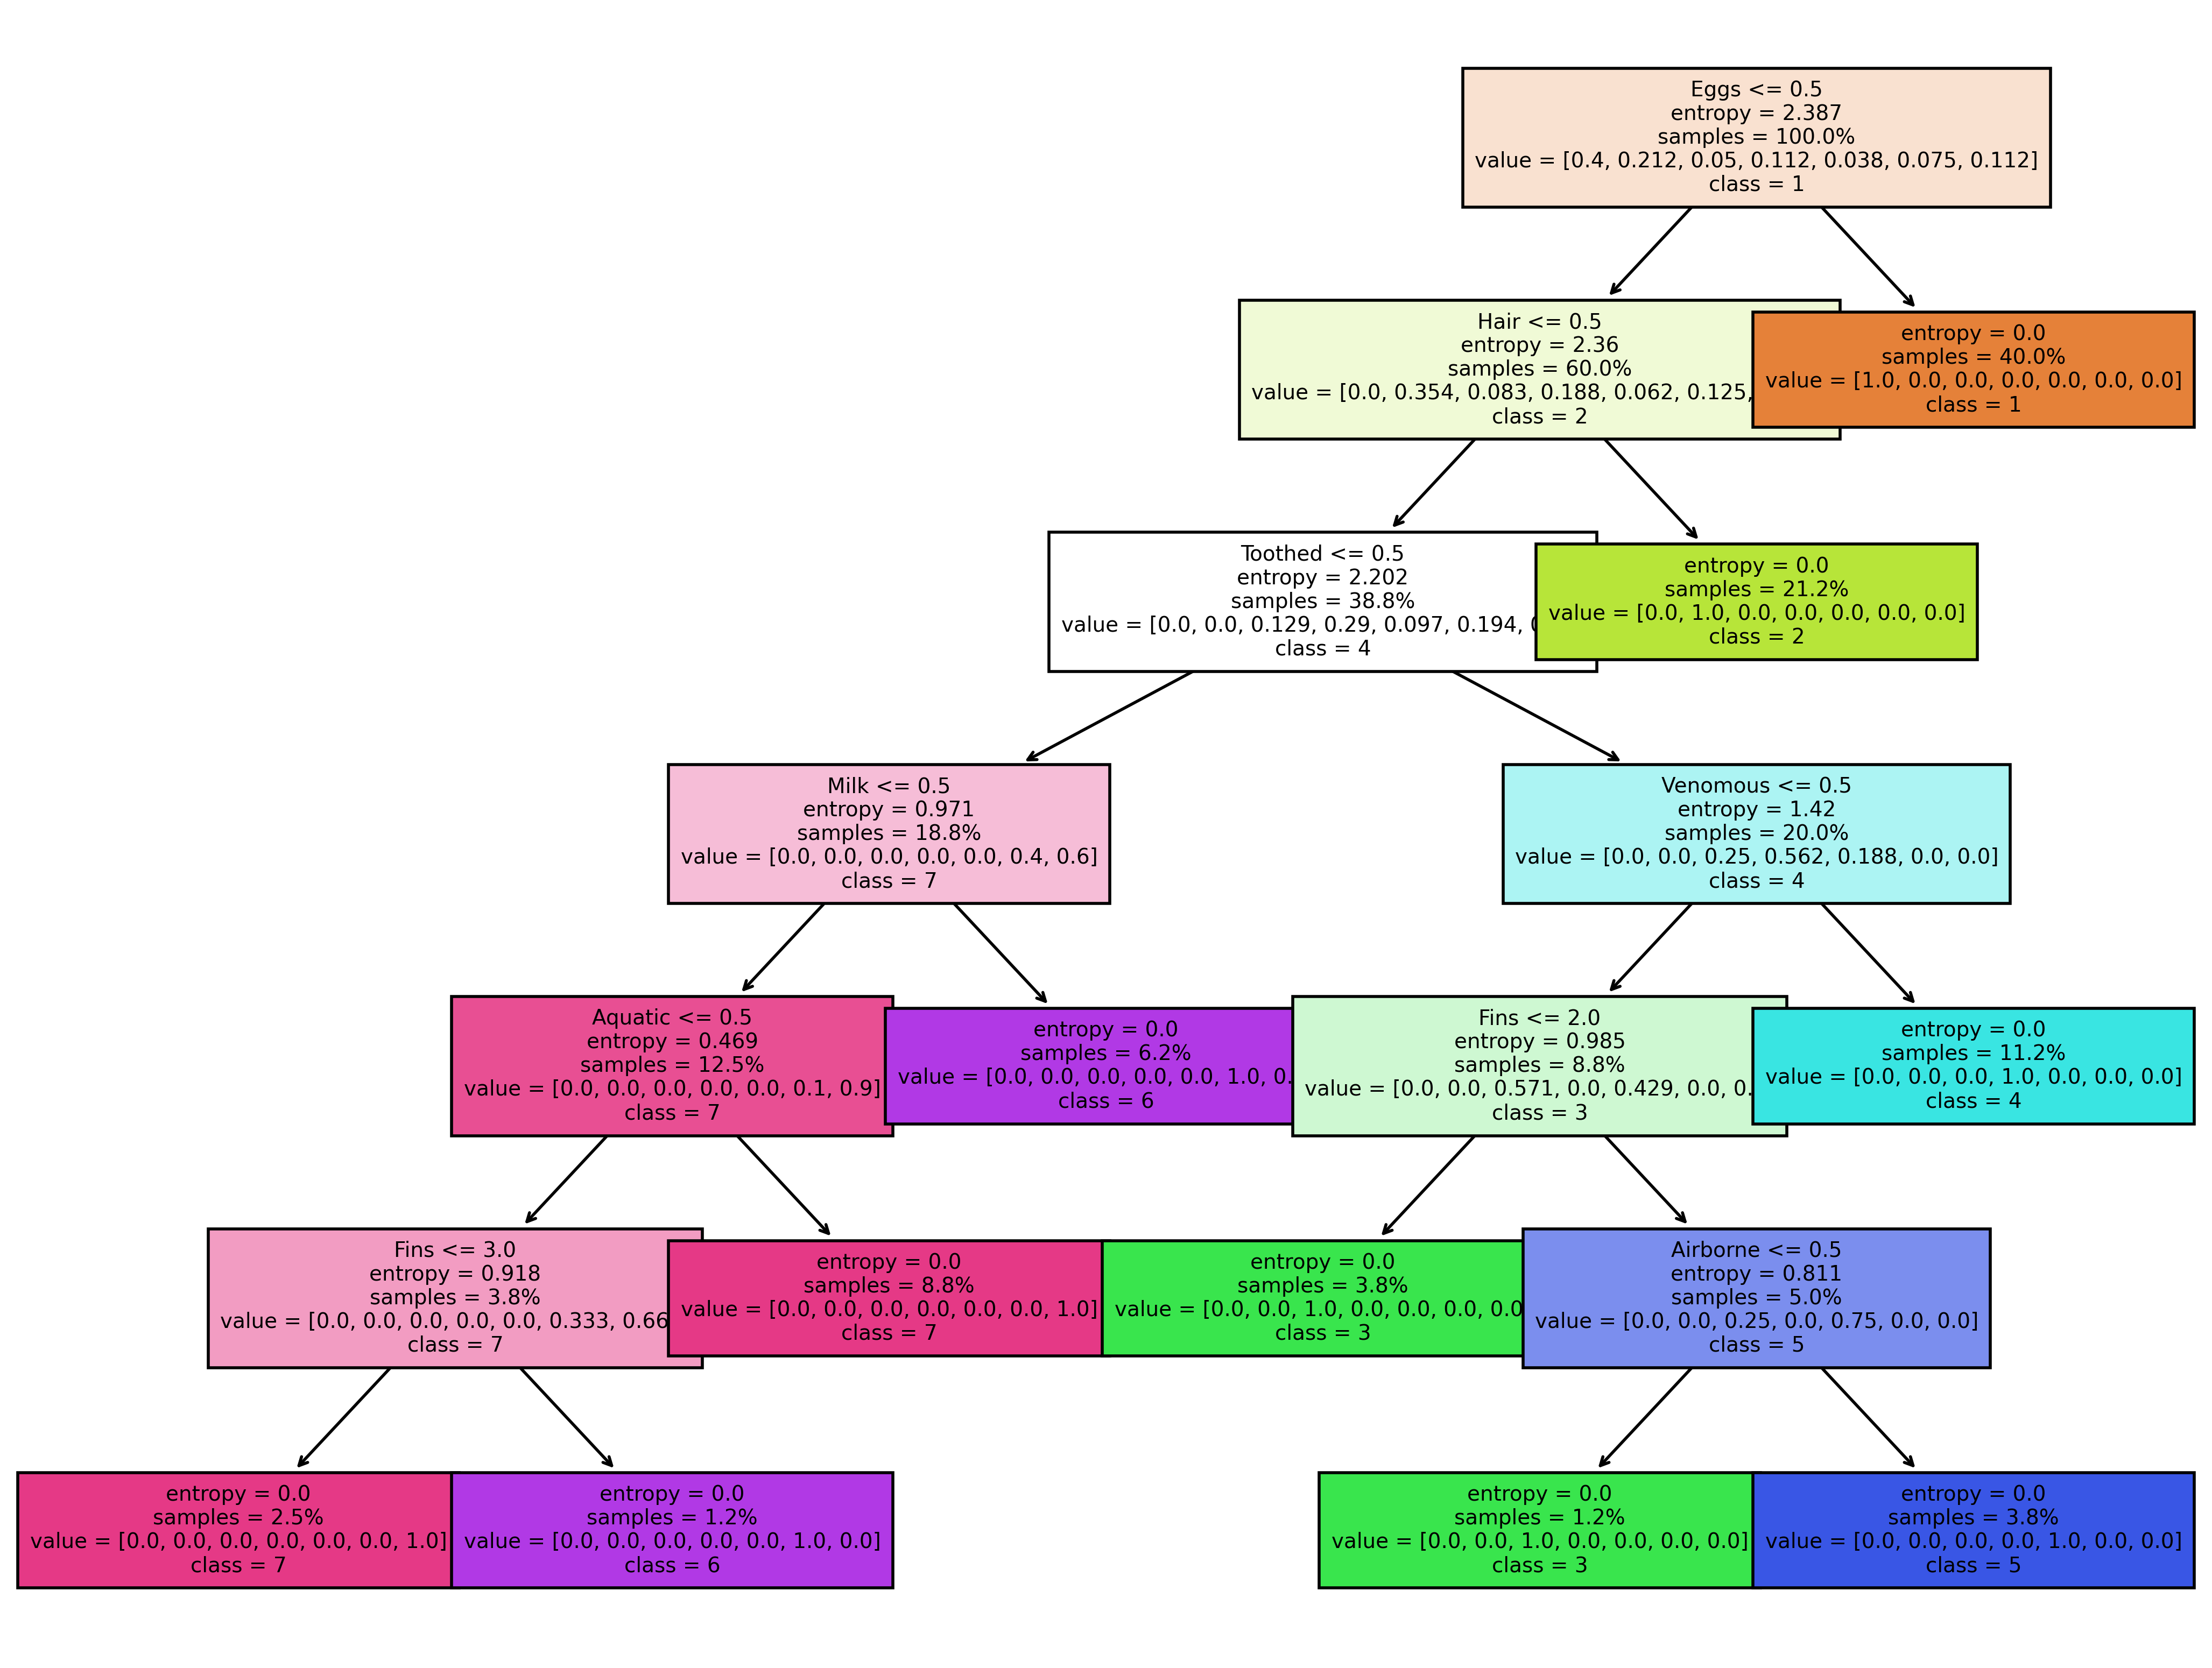

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 10), dpi = 400)

plot_tree(decision_tree=clf_entropy,
          feature_names= data.columns,
          class_names= ['1','2','3','4','5','6','7'],
          proportion=True,
          filled=True,
          fontsize=7,
          precision=3);

In [39]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [40]:
clf_gini_pred = clf_gini.predict(X_test)

In [41]:
accuracy_score(y_test, clf_gini_pred)

1.0

In [43]:
print(classification_report(y_test, clf_gini_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



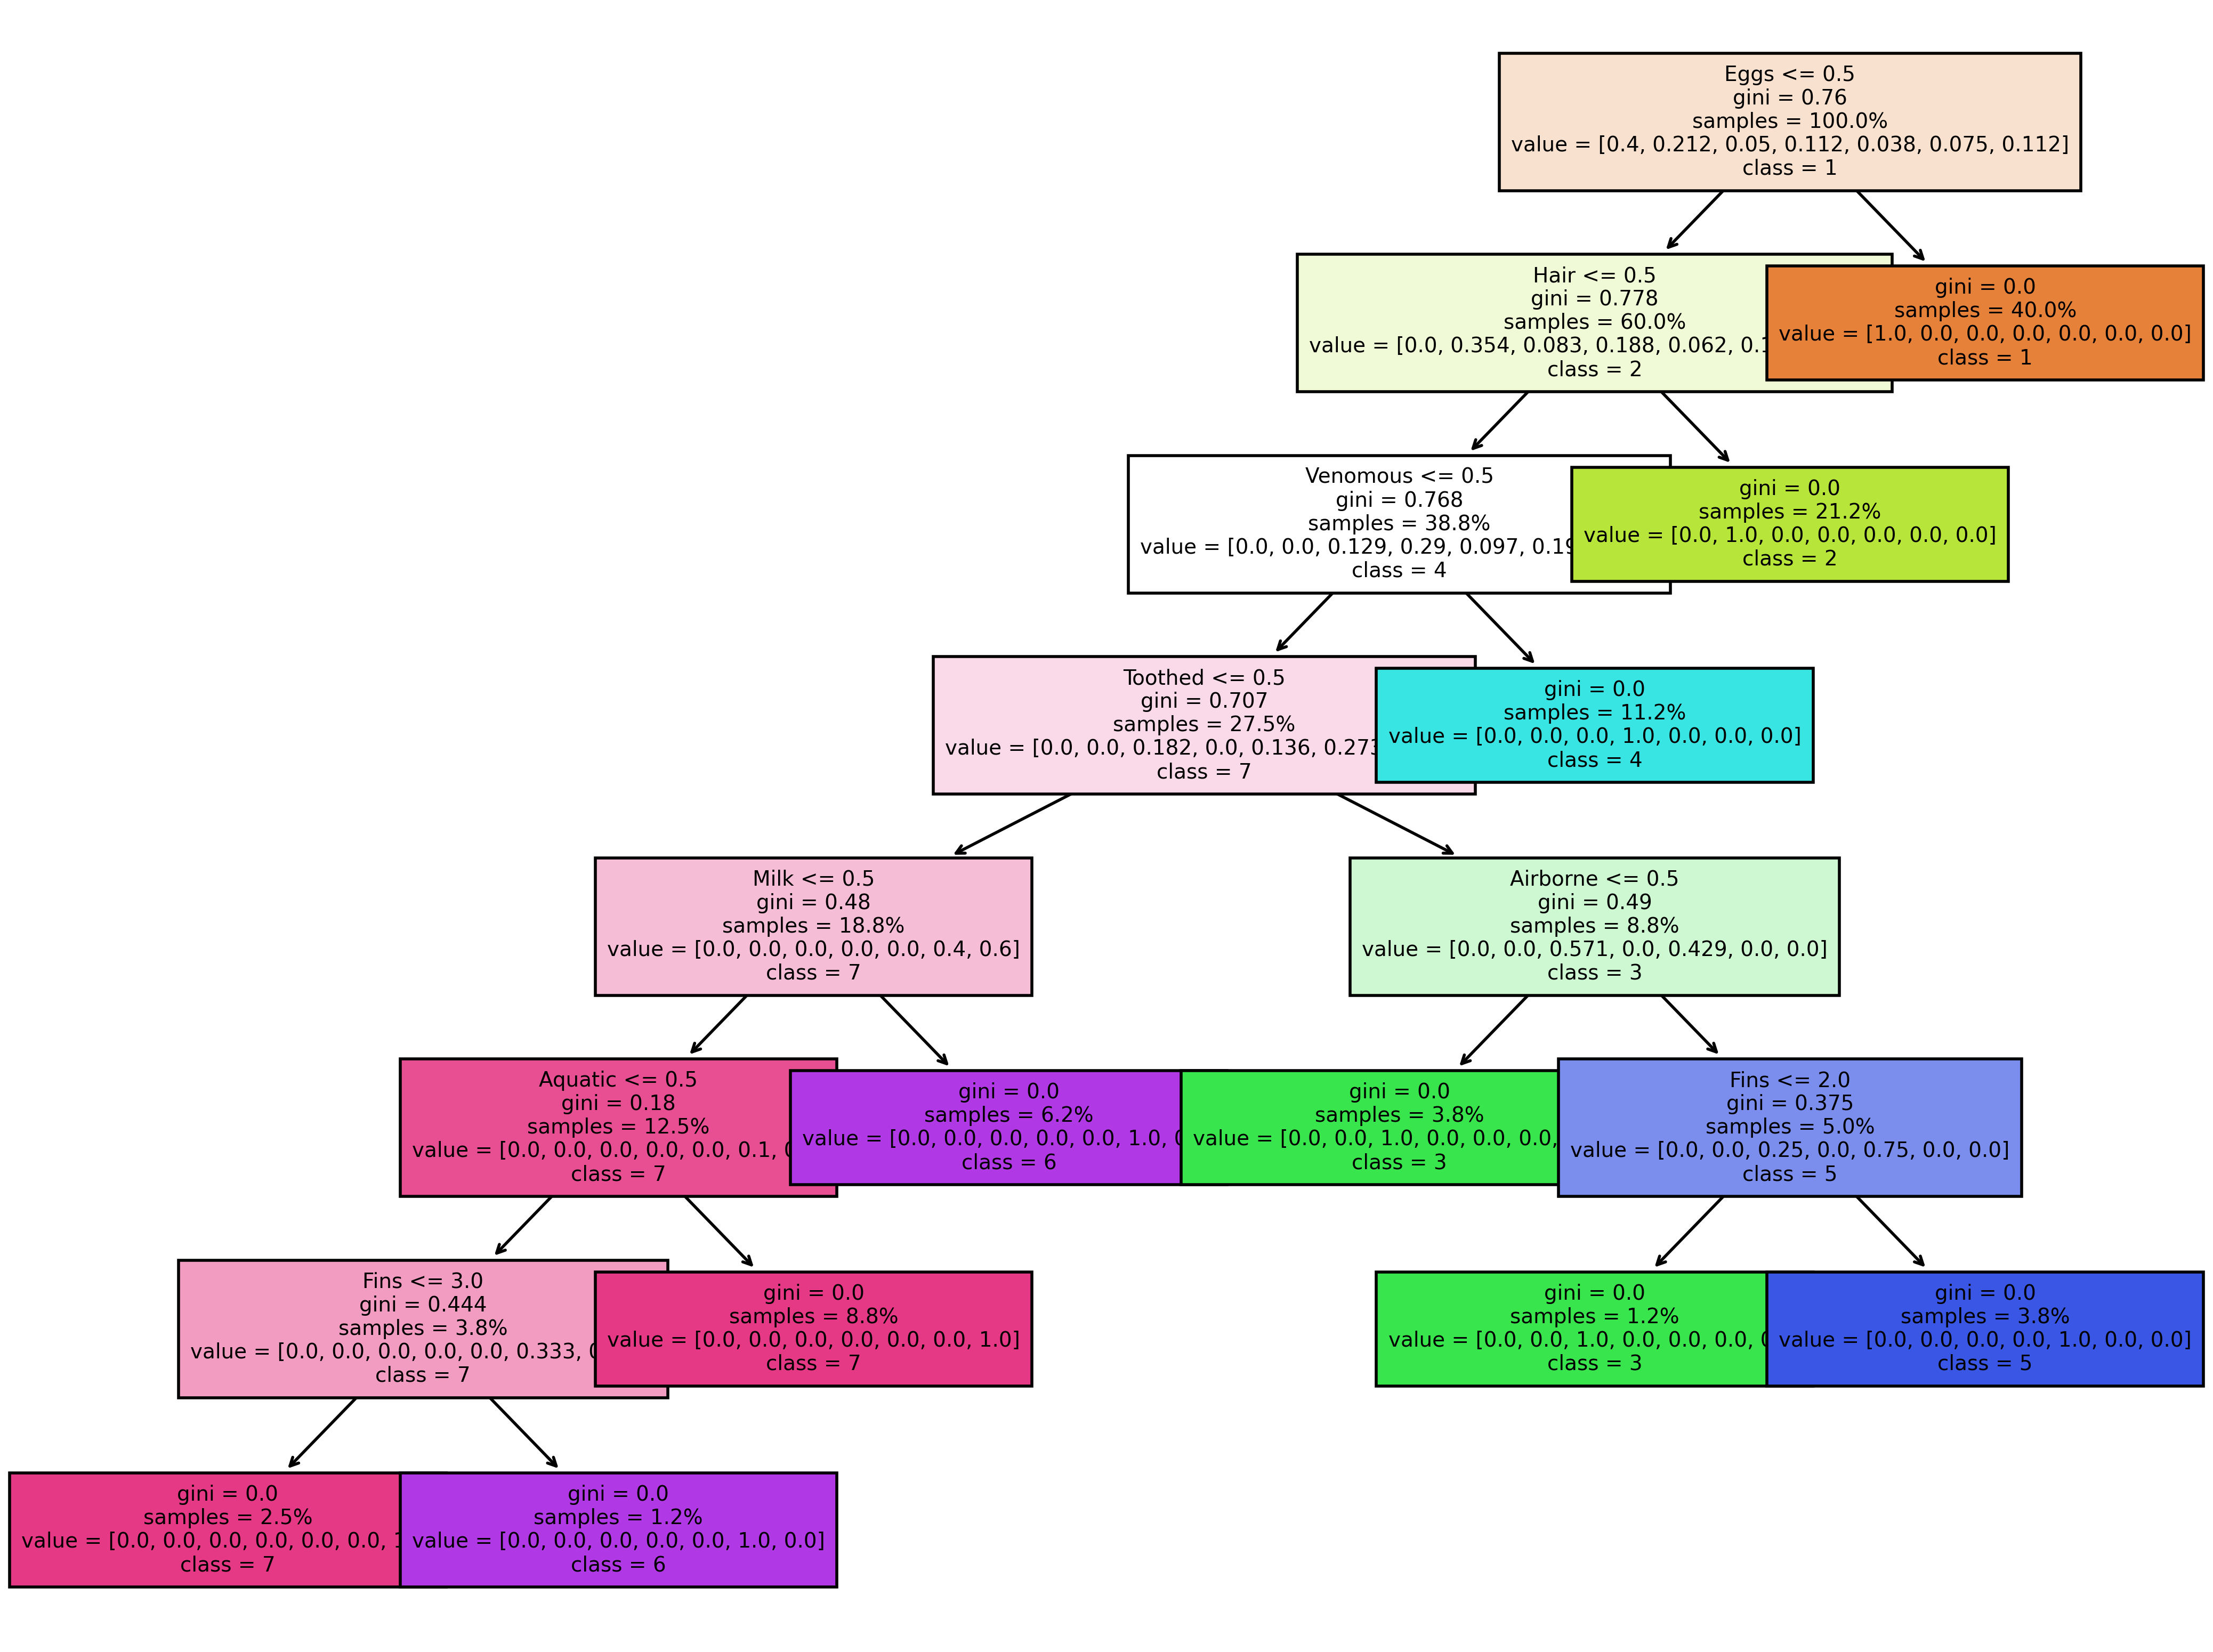

In [46]:
plt.figure(figsize = (13,10), dpi=400)
plot_tree(decision_tree=clf_gini,
          feature_names= data.columns,
          class_names= ['1','2','3','4','5','6','7'],
          proportion=True,
          filled=True,
          fontsize=7,
          precision=3);